In [1]:
################################################################################
# Definindo um caminho personalizado para bibliotecas R
################################################################################
# Exemplo de caminho: pode ser uma pasta dentro do seu diretório home
# Lembre-se que o R pode adicionar subdiretórios específicos da versão/arquitetura
meu_caminho_biblioteca <- "~/R/library"

# Define a variável de ambiente R_LIBS_USER para a sessão atual
Sys.setenv(R_LIBS_USER = meu_caminho_biblioteca)

# Verifica o valor da variável de ambiente
Sys.getenv("R_LIBS_USER")

# Mostra todos os caminhos de biblioteca que o R está usando
# O seu novo caminho deve aparecer aqui, geralmente como o primeiro da lista.
.libPaths()

[1] "~/R/library"

[1] "/usr/local/lib/R/site-library" "/usr/local/lib/R/library"     
[3] "/home/vscode/R/library"

In [2]:
################################################################################
#               INSTALAÇÃO E CARREGAMENTO DE PACOTES NECESSÁRIOS               #
################################################################################

# Pacotes utilizados
pacotes <- c("tidyverse", #carregar outros pacotes do R
             "knitr", "kableExtra") #formatação de tabelas

if(sum(as.numeric(!pacotes %in% installed.packages())) != 0){
  instalador <- pacotes[!pacotes %in% installed.packages()]
  for(i in 1:length(instalador)) {
    install.packages(instalador, dependencies = T, lib = meu_caminho_biblioteca)
    break()}
  sapply(pacotes, require, character = T, lib = meu_caminho_biblioteca) 
} else {
  sapply(pacotes, require, character = T, lib = meu_caminho_biblioteca) 
}

Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: knitr

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘knitr’”
Loading required package: kableExtra


Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows




tidyverse      knitr kableExtra 
      TRUE      FALSE       TRUE

Monte código R para carga do CSV (Trabalho/bases-de-dados/condicoes-de-pavimento/mes-a-mes/icm-parte-1.csv) conforme a seguir. 
Considere a formatação da data e dos números com vírgula que são floats e estão no formato brasileiro. Padronize os valore nulos para NA.
A data está no padrão dd/mm/aaaa.
Ao final salve o dataframe icm-mes-a-mes como um arquivo .Rdata "Trabalho/bases-de-dados/condicoes-de-pavimento/mes-a-mes/icm-mes-a-mes.Rdata".
Considere este cabeçalho:
UF;Rodovia;km inicial;km final;Extensão km;Data;Latitude;Longitude;Observação;ICC;ICP;ICM
Considere que a primeira linha do arquivo já é um registro, não há cabeçalho no arquivo CSV.
PE;BR-232;324,400;325,000;0,600;02/08/2021;-8,0919126;-37,5783077;;100,000;12,500;38,750
PE;BR-232;325,000;326,000;1,000;02/08/2021;-8,0917032;-37,5875338;;100,000;0,000;30,000
PE;BR-232;326,000;327,000;1,000;02/08/2021;-8,09109018;-37,5960345;Ausencia de Sinalizacao Vertical;90,000;0,000;27,000
PE;BR-232;327,000;328,000;1,000;02/08/2021;-8,09036961;-37,605063;;75,000;0,000;22,500
PE;BR-232;328,000;329,000;1,000;02/08/2021;-8,08970869;-37,6138959;;65,000;0,000;19,500
PE;BR-232;329,000;330,000;1,000;02/08/2021;-8,08904419;-37,6230826;Inicio do Trecho Urbano Custodia;65,000;0,000;19,500
PE;BR-232;330,000;331,000;1,000;02/08/2021;-8,0884133;-37,6321504;;65,000;0,000;19,500
PE;BR-232;331,000;332,000;1,000;02/08/2021;-8,08582552;-37,6411208;;60,000;0,000;18,000
PE;BR-232;332,000;333,000;1,000;02/08/2021;-8,08381032;-37,6504026;;50,000;0,000;15,000
PE;BR-232;333,000;334,000;1,000;02/08/2021;-8,08323974;-37,6589918;;50,000;0,000;15,000
PE;BR-232;334,000;335,000;1,000;02/08/2021;-8,08155757;-37,6699127;Final do Trecho Urbano de Custodia;65,000;0,000;19,500
PE;BR-232;335,000;336,000;1,000;02/08/2021;-8,08020122;-37,6776362;;65,000;0,000;19,500
PE;BR-232;336,000;337,000;1,000;02/08/2021;-8,08237562;-37,6854182;;65,000;12,500;28,250
PE;BR-232;337,000;338,000;1,000;02/08/2021;-8,08560692;-37,6942491;;65,000;0,000;19,500
PE;BR-232;338,000;339,000;1,000;02/08/2021;-8,08788167;-37,7047279;;65,000;0,000;19,500
PE;BR-232;339,000;340,000;1,000;02/08/2021;-8,08797722;-37,7121751;;75,000;0,000;22,500
PE;BR-232;340,000;341,000;1,000;02/08/2021;-8,08819352;-37,7212926;;65,000;0,000;19,500
PE;BR-232;341,000;342,000;1,000;02/08/2021;-8,08877027;-37,7307222;;65,000;0,000;19,500
PE;BR-232;342,000;343,000;1,000;02/08/2021;-8,09008853;-37,740077;;65,000;0,000;19,500
PE;BR-232;343,000;344,000;1,000;02/08/2021;-8,09158308;-37,7484959;;65,000;12,500;28,250

In [10]:
################################################################################
#                    CARREGAMENTO E TRATAMENTO DOS DADOS - PARTE 1             #
################################################################################

# Define os nomes das colunas conforme especificado (12 colunas)
nomes_colunas <- c("UF", "Rodovia", "km inicial", "km final", 
                   "Extensão km", "Data", "Latitude", "Longitude", 
                   "Observação", "ICC", "ICP", "ICM")

# Carrega o arquivo CSV com formatação brasileira
# Delimitador: ; (ponto e vírgula)
# Primeira linha é um registro (sem cabeçalho)
icm_mes_a_mes <- read_delim(
  "Trabalho/bases-de-dados/condicoes-de-pavimento/mes-a-mes/icm-parte-1.csv",
  delim = ";",
  col_names = nomes_colunas,
  locale = locale(
    decimal_mark = ",",
    encoding = "UTF-8"
  ),
  na = c("", "NA"),
  col_types = cols(
    UF = col_character(),
    Rodovia = col_character(),
    `km inicial` = col_double(),
    `km final` = col_double(),
    `Extensão km` = col_double(),
    Data = col_date(format = "%d/%m/%Y"),
    Latitude = col_double(),
    Longitude = col_double(),
    Observação = col_character(),
    ICC = col_double(),
    ICP = col_double(),
    ICM = col_double()
  )
)

# Visualiza os primeiros registros
head(icm_mes_a_mes)

# Verifica estrutura dos dados
str(icm_mes_a_mes)

# Sumário dos dados
summary(icm_mes_a_mes)

# Salva como arquivo RData
save(icm_mes_a_mes, file = "Trabalho/bases-de-dados/condicoes-de-pavimento/mes-a-mes/icm-mes-a-mes.Rdata")

# Confirma que o arquivo foi salvo
cat("Arquivo icm-mes-a-mes.Rdata salvo com sucesso!\n")
cat("Dimensões do dataframe: ", nrow(icm_mes_a_mes), " linhas e ", ncol(icm_mes_a_mes), " colunas\n", sep = "")

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”


UF,Rodovia,km inicial,km final,Extensão km,Data,Latitude,Longitude,Observação,ICC,ICP,ICM
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
PE,BR-232,324.4,325,0.6,2021-08-02,-8.091913,-37.57831,NA,100,12.5,38.75
PE,BR-232,325.0,326,1.0,2021-08-02,-8.091703,-37.58753,NA,100,0.0,30.00
PE,BR-232,326.0,327,1.0,2021-08-02,-8.091090,-37.59603,Ausencia de Sinalizacao Vertical,90,0.0,27.00
PE,BR-232,327.0,328,1.0,2021-08-02,-8.090370,-37.60506,NA,75,0.0,22.50
PE,BR-232,328.0,329,1.0,2021-08-02,-8.089709,-37.61390,NA,65,0.0,19.50
PE,BR-232,329.0,330,1.0,2021-08-02,-8.089044,-37.62308,Inicio do Trecho Urbano Custodia,65,0.0,19.50


spc_tbl_ [328,401 × 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ UF         : chr [1:328401] "PE" "PE" "PE" "PE" ...
 $ Rodovia    : chr [1:328401] "BR-232" "BR-232" "BR-232" "BR-232" ...
 $ km inicial : num [1:328401] 324 325 326 327 328 ...
 $ km final   : num [1:328401] 325 326 327 328 329 330 331 332 333 334 ...
 $ Extensão km: num [1:328401] 0.6 1 1 1 1 1 1 1 1 1 ...
 $ Data       : Date[1:328401], format: "2021-08-02" "2021-08-02" ...
 $ Latitude   : num [1:328401] -8.09 -8.09 -8.09 -8.09 -8.09 ...
 $ Longitude  : num [1:328401] -37.6 -37.6 -37.6 -37.6 -37.6 ...
 $ Observação : chr [1:328401] NA NA "Ausencia de Sinalizacao Vertical" NA ...
 $ ICC        : num [1:328401] 100 100 90 75 65 65 65 60 50 50 ...
 $ ICP        : num [1:328401] 12.5 0 0 0 0 0 0 0 0 0 ...
 $ ICM        : num [1:328401] 38.8 30 27 22.5 19.5 ...
 - attr(*, "spec")=
  .. cols(
  ..   UF = col_character(),
  ..   Rodovia = col_character(),
  ..   `km inicial` = col_double(),
  ..   `km final` = col_double(),

      UF              Rodovia            km inicial         km final      
 Length:328401      Length:328401      Min.   :    0.0   Min.   :   -1.0  
 Class :character   Class :character   1st Qu.:   98.0   1st Qu.:   98.0  
 Mode  :character   Mode  :character   Median :  226.0   Median :  227.0  
                                       Mean   :  296.9   Mean   :  297.3  
                                       3rd Qu.:  430.0   3rd Qu.:  431.0  
                                       Max.   :10706.0   Max.   :10707.0  
                                       NA's   :34468     NA's   :3        
  Extensão km           Data               Latitude        Longitude     
 Min.   :   0.00   Min.   :2021-02-01   Min.   :-30.88   Min.   :-99.15  
 1st Qu.:   1.00   1st Qu.:2021-07-05   1st Qu.:-17.79   1st Qu.:-53.39  
 Median :   1.00   Median :2021-08-26   Median : -9.75   Median :-46.97  
 Mean   :  32.43   Mean   :2021-08-28   Mean   :-11.97   Mean   :-41.90  
 3rd Qu.:   1.00   3rd Qu.:202

Arquivo icm-mes-a-mes.Rdata salvo com sucesso!
Dimensões do dataframe: 328401 linhas e 12 colunas


Monte código R para carga do CSV (Trabalho/bases-de-dados/condicoes-de-pavimento/mes-a-mes/icm-parte-2.csv) conforme a seguir. 
Considere a formatação da data e dos números com vírgula que são floats e estão no formato brasileiro. 
O separador também é "," e os valores float estão entre aspas duplas.
Padronize os valore nulos para NA.
A data está no padrão dd/mm/aaaa.
Ao final salve o dataframe icm-parte-2 unindo aos dados já existentes em "Trabalho/bases-de-dados/condicoes-de-pavimento/mes-a-mes/icm-mes-a-mes.Rdata".
Considere este cabeçalho:
UF;Rodovia;km inicial;km final;Extensão km;Data;Latitude;Longitude;Observação;ICC;ICP;ICM
Considere que a primeira linha do arquivo já é um registro, não há cabeçalho no arquivo CSV.
SC,BR-280,"0,000","1,000","1,000",01/04/2021,"-26,2360116","-48,6289083",,"65,000","85,000","79,000"
SC,BR-280,"1,000","2,000","1,000",01/04/2021,"-26,2394219","-48,6321529",,"20,000","20,000","20,000"
SC,BR-280,"2,000","3,000","1,000",01/04/2021,"-26,2372121","-48,6192631",,"32,500","47,500","43,000"
SC,BR-280,"3,000","4,000","1,000",01/04/2021,"-26,2372121","-48,6192631",,"42,500","27,500","32,000"
SC,BR-280,"4,000","5,000","1,000",01/04/2021,"-26,2532691","-48,618678",,"40,000","47,500","45,250"
SC,BR-280,"5,000","6,000","1,000",01/04/2021,"-26,2595528","-48,6255717",,"40,000","35,000","36,500"
SC,BR-280,"6,000","7,000","1,000",01/04/2021,"-26,2650357","-48,632211",,"27,500","62,500","52,000"
SC,BR-280,"7,000","8,000","1,000",01/04/2021,"-26,2707302","-48,6408116",,"27,500","47,500","41,500"
SC,BR-280,"8,000","9,000","1,000",01/04/2021,"-26,2707302","-48,6408116",,"20,000","62,500","49,750"
SC,BR-280,"9,000","10,000","1,000",01/04/2021,"-26,2875266","-48,6460583",,"20,000","50,000","41,000"
SC,BR-280,"10,000","11,000","1,000",01/04/2021,"-26,2961533","-48,6424616",,"20,000","25,000","23,500"
SC,BR-280,"11,000","12,000","1,000",01/04/2021,"-26,3046855","-48,6410263",,"27,500","27,500","27,500"
SC,BR-280,"12,000","13,000","1,000",01/04/2021,"-26,2961533","-48,6424616",,"20,000","47,500","39,250"
SC,BR-280,"13,000","14,000","1,000",01/04/2021,"-26,3119222","-48,6443703",,"27,500","50,000","43,250"
SC,BR-280,"14,000","15,000","1,000",01/04/2021,"-26,3119222","-48,6443703",,"27,500","50,000","43,250"
SC,BR-280,"15,000","16,000","1,000",01/04/2021,"-26,3388152","-48,6543576",,"27,500","62,500","52,000"
SC,BR-280,"16,000","17,000","1,000",01/04/2021,"-26,3477316","-48,6580266",,"42,500","50,000","47,750"
SC,BR-280,"17,000","18,000","1,000",01/04/2021,"-26,3557733","-48,6601583",,"27,500","35,000","32,750"
SC,BR-280,"18,000","19,000","1,000",01/04/2021,"-26,3642083","-48,6643316",,"27,500","47,500","41,500"
SC,BR-280,"19,000","20,000","1,000",01/04/2021,"-26,3693916","-48,671975",,"27,500","17,500","20,500"
SC,BR-280,"20,000","21,000","1,000",01/04/2021,"-26,3693916","-48,671975",,"27,500","12,500","17,000"
SC,BR-280,"21,000","22,000","1,000",01/04/2021,"-26,370557","-48,6922818",,"55,000","10,000","23,500"
SC,BR-280,"22,000","23,000","1,000",01/04/2021,"-26,3718587","-48,7108293",,"40,000","52,500","48,750"
SC,BR-280,"23,000","24,000","1,000",01/04/2021,"-26,3718587","-48,7108293",,"20,000","40,000","34,000"
SC,BR-280,"24,000","25,000","1,000",01/04/2021,"-26,3718587","-48,7108293",,"40,000","17,500","24,250"
SC,BR-280,"25,000","26,000","1,000",01/04/2021,"-26,3853399","-48,7288357",,"27,500","25,000","25,750"

In [11]:
################################################################################
#                    CARREGAMENTO DA SEGUNDA PARTE DOS DADOS                   #
################################################################################

# Carrega arquivo RData existente
load("Trabalho/bases-de-dados/condicoes-de-pavimento/mes-a-mes/icm-mes-a-mes.Rdata")

# Define os nomes das colunas (12 colunas - mesmo padrão da parte 1)
nomes_colunas <- c("UF", "Rodovia", "km inicial", "km final", 
                   "Extensão km", "Data", "Latitude", "Longitude", 
                   "Observação", "ICC", "ICP", "ICM")

# Carrega o segundo arquivo CSV com delimitador "," e valores entre aspas
icm_parte_2 <- read_delim(
  "Trabalho/bases-de-dados/condicoes-de-pavimento/mes-a-mes/icm-parte-2.csv",
  delim = ",",
  col_names = nomes_colunas,
  locale = locale(
    decimal_mark = ",",
    encoding = "UTF-8"
  ),
  na = c("", "NA"),
  col_types = cols(
    UF = col_character(),
    Rodovia = col_character(),
    `km inicial` = col_double(),
    `km final` = col_double(),
    `Extensão km` = col_double(),
    Data = col_date(format = "%d/%m/%Y"),
    Latitude = col_double(),
    Longitude = col_double(),
    Observação = col_character(),
    ICC = col_double(),
    ICP = col_double(),
    ICM = col_double()
  )
)

# Visualiza os primeiros registros da parte 2
head(icm_parte_2)

# Verifica estrutura dos dados
str(icm_parte_2)

# Une os dois dataframes
icm_mes_a_mes <- bind_rows(icm_mes_a_mes, icm_parte_2)

# Verifica o resultado consolidado
cat("Total de registros após consolidação:", nrow(icm_mes_a_mes), "\n")
cat("Registros por UF:\n")
print(table(icm_mes_a_mes$UF))

# Visualiza amostra dos dados consolidados
head(icm_mes_a_mes, 10)
tail(icm_mes_a_mes, 10)

# Salva o dataframe consolidado
save(icm_mes_a_mes, file = "Trabalho/bases-de-dados/condicoes-de-pavimento/mes-a-mes/icm-mes-a-mes.Rdata")

# Confirma que o arquivo foi salvo
cat("Arquivo icm-mes-a-mes.Rdata atualizado com sucesso!\n")
cat("Total final de", nrow(icm_mes_a_mes), "registros salvos.\n")

UF,Rodovia,km inicial,km final,Extensão km,Data,Latitude,Longitude,Observação,ICC,ICP,ICM
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
SC,BR-280,0,1,1,2021-04-01,-26.23601,-48.62891,NA,65.0,85.0,79.00
SC,BR-280,1,2,1,2021-04-01,-26.23942,-48.63215,NA,20.0,20.0,20.00
SC,BR-280,2,3,1,2021-04-01,-26.23721,-48.61926,NA,32.5,47.5,43.00
SC,BR-280,3,4,1,2021-04-01,-26.23721,-48.61926,NA,42.5,27.5,32.00
SC,BR-280,4,5,1,2021-04-01,-26.25327,-48.61868,NA,40.0,47.5,45.25
SC,BR-280,5,6,1,2021-04-01,-26.25955,-48.62557,NA,40.0,35.0,36.50


spc_tbl_ [65,829 × 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ UF         : chr [1:65829] "SC" "SC" "SC" "SC" ...
 $ Rodovia    : chr [1:65829] "BR-280" "BR-280" "BR-280" "BR-280" ...
 $ km inicial : num [1:65829] 0 1 2 3 4 5 6 7 8 9 ...
 $ km final   : num [1:65829] 1 2 3 4 5 6 7 8 9 10 ...
 $ Extensão km: num [1:65829] 1 1 1 1 1 1 1 1 1 1 ...
 $ Data       : Date[1:65829], format: "2021-04-01" "2021-04-01" ...
 $ Latitude   : num [1:65829] -26.2 -26.2 -26.2 -26.2 -26.3 ...
 $ Longitude  : num [1:65829] -48.6 -48.6 -48.6 -48.6 -48.6 ...
 $ Observação : chr [1:65829] NA NA NA NA ...
 $ ICC        : num [1:65829] 65 20 32.5 42.5 40 40 27.5 27.5 20 20 ...
 $ ICP        : num [1:65829] 85 20 47.5 27.5 47.5 35 62.5 47.5 62.5 50 ...
 $ ICM        : num [1:65829] 79 20 43 32 45.2 ...
 - attr(*, "spec")=
  .. cols(
  ..   UF = col_character(),
  ..   Rodovia = col_character(),
  ..   `km inicial` = col_double(),
  ..   `km final` = col_double(),
  ..   `Extensão km` = col_double(),
  ..   

UF,Rodovia,km inicial,km final,Extensão km,Data,Latitude,Longitude,Observação,ICC,ICP,ICM
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
PE,BR-232,324.4,325,0.6,2021-08-02,-8.091913,-37.57831,NA,100,12.5,38.75
PE,BR-232,325.0,326,1.0,2021-08-02,-8.091703,-37.58753,NA,100,0.0,30.00
PE,BR-232,326.0,327,1.0,2021-08-02,-8.091090,-37.59603,Ausencia de Sinalizacao Vertical,90,0.0,27.00
PE,BR-232,327.0,328,1.0,2021-08-02,-8.090370,-37.60506,NA,75,0.0,22.50
PE,BR-232,328.0,329,1.0,2021-08-02,-8.089709,-37.61390,NA,65,0.0,19.50
PE,BR-232,329.0,330,1.0,2021-08-02,-8.089044,-37.62308,Inicio do Trecho Urbano Custodia,65,0.0,19.50
PE,BR-232,330.0,331,1.0,2021-08-02,-8.088413,-37.63215,NA,65,0.0,19.50
PE,BR-232,331.0,332,1.0,2021-08-02,-8.085826,-37.64112,NA,60,0.0,18.00
PE,BR-232,332.0,333,1.0,2021-08-02,-8.083810,-37.65040,NA,50,0.0,15.00


UF,Rodovia,km inicial,km final,Extensão km,Data,Latitude,Longitude,Observação,ICC,ICP,ICM
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
PA,BR-158,885.0,886,1.0,2021-03-30,-8.439155,-50.04488,NA,52.5,100,85.75
PA,BR-158,886.0,887,1.0,2021-03-30,-8.439155,-50.04488,NA,52.5,100,85.75
PA,BR-158,887.0,888,1.0,2021-03-30,-8.439155,-50.04488,NA,77.5,100,93.25
PA,BR-158,888.0,889,1.0,2021-03-30,-8.439155,-50.04488,NA,52.5,100,85.75
PA,BR-158,889.0,890,1.0,2021-03-30,-8.439155,-50.04488,NA,42.5,100,82.75
AM,BR-230,211.9,210,1.9,2021-03-03,-7.521738,-63.02841,NA,100.0,20,44.00
AM,BR-230,210.0,209,1.0,2021-03-03,-7.521738,-63.02841,NA,90.0,10,34.00
AM,BR-230,209.0,208,1.0,2021-03-03,-7.521738,-63.02841,NA,100.0,100,100.00
AM,BR-230,208.0,207,1.0,2021-03-11,-7.519556,-63.02975,NA,85.0,85,85.00


Arquivo icm-mes-a-mes.Rdata atualizado com sucesso!
Total final de 394230 registros salvos.


Para a rodovia BR-230 mostre o valor de ICM por data, numa série temporal. No eixo X apresente a data no padrão mes/ano.

Warning message:
“There were 50 warnings in `summarise()`.
The first warning was:
ℹ In argument: `ICM_min = min(ICM, na.rm = TRUE)`.
ℹ In group 40: `Data = 2021-06-02`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf
ℹ Run `dplyr::last_dplyr_warnings()` to see the 49 remaining warnings.”


Data,ICM_medio,ICM_min,ICM_max
<date>,<dbl>,<dbl>,<dbl>
2021-02-01,52.13889,29.75,88.75
2021-02-02,37.55288,9.00,54.75
2021-02-06,34.23529,27.25,49.50
2021-02-11,65.00000,40.00,73.00
2021-02-18,19.60503,7.50,84.25
2021-02-19,31.12736,11.25,89.50
2021-02-22,51.31696,28.50,82.75
2021-02-23,35.18966,25.00,92.50
2021-02-24,14.50839,7.50,81.25


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 25 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_ribbon()`).”


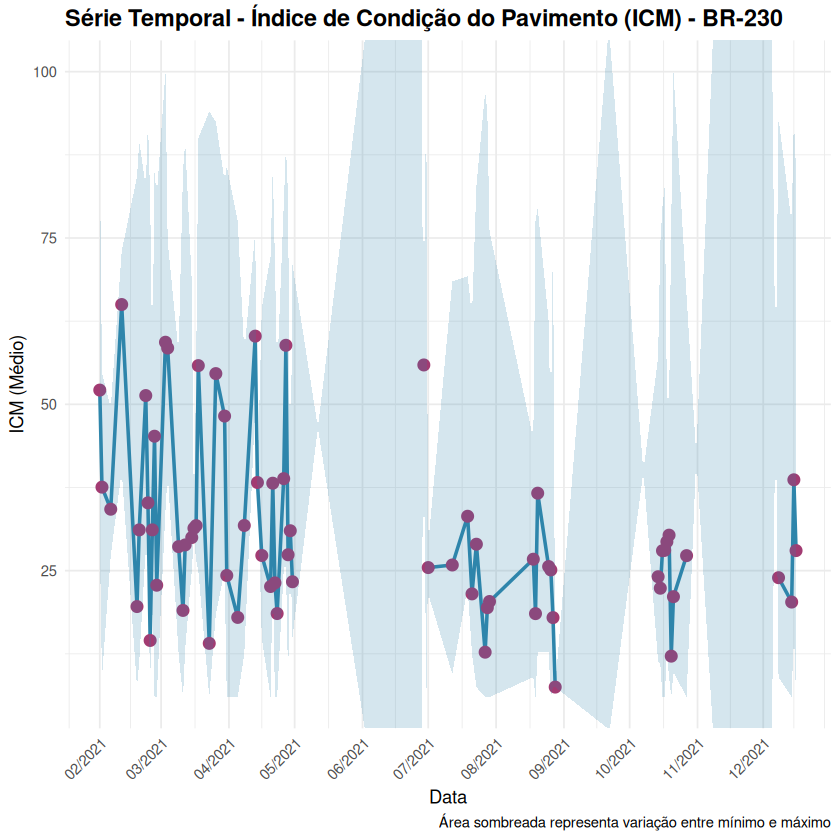

In [13]:
################################################################################
#           SÉRIE TEMPORAL DO ICM PARA A RODOVIA BR-230                        #
################################################################################

# Filtra dados para BR-230 e prepara para série temporal
icm_br230_temporal <- icm_mes_a_mes %>%
    filter(Rodovia == "BR-230") %>%
    group_by(Data) %>%
    summarise(ICM_medio = mean(ICM, na.rm = TRUE),
                        ICM_min = min(ICM, na.rm = TRUE),
                        ICM_max = max(ICM, na.rm = TRUE),
                        .groups = 'drop') %>%
    arrange(Data)

# Visualiza os dados preparados
head(icm_br230_temporal, 10)

# Cria gráfico de série temporal
ggplot(icm_br230_temporal, aes(x = Data, y = ICM_medio)) +
    geom_line(color = "#2E86AB", size = 1) +
    geom_point(color = "#A23B72", size = 3) +
    geom_ribbon(aes(ymin = ICM_min, ymax = ICM_max), 
                            alpha = 0.2, fill = "#2E86AB") +
    scale_x_date(date_labels = "%m/%Y", date_breaks = "1 month") +
    labs(
        title = "Série Temporal - Índice de Condição do Pavimento (ICM) - BR-230",
        x = "Data",
        y = "ICM (Médio)",
        caption = "Área sombreada representa variação entre mínimo e máximo"
    ) +
    theme_minimal() +
    theme(
        plot.title = element_text(face = "bold", size = 14),
        axis.text.x = element_text(angle = 45, hjust = 1)
    )